

###### Exercise
Use the dataset from your assignment 1. Look at each attribute and see what type of data it has.
###### Question 1
Explore the data and answer the following:
What type of attributes of the data?
Explore the data to check, whether is it balance?
What attribute is useful and what is not? why?
###### Question 2
Experiment with the decision tree algorithm introduced in this lab to predict the class of the data that you use. Use default parameter configurations. Try
conduct also at least 5 fold cross-validation (refer to your previous lab). Compare the algorithms and specify your findings. Answer the following questions:
Do cross-validation effect algorithms' performance?
Try using 1 other parameter configurations and compare them to their default configuration. How much they differ?

# Step 2: Data Understanding

In [1]:
# Import important libarery 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

# import dataset and add columm names to the imporated dataset

colName = ['buying','maintenance','doors','persons','luggage boot','safety','class']
data = pd.read_csv('https://raw.githubusercontent.com/abdo-projects/data-science-portfolio/main/Dataset/car.csv', names = colName)

# Show the the tope 5 obersrvation of the dataset
display(data.head(5))

#Show data desccription
display(data.describe())

#show data shape
display(data.shape)

# show data type

display(data.dtypes)

,buying,maintenance,doors,persons,luggage boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


,buying,maintenance,doors,persons,luggage boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


(1728, 7)

buying          object
maintenance     object
doors           object
persons         object
luggage boot    object
safety          object
class           object
dtype: object

- Because all data attributes are categorical, in order to plot heat map, it has to be encoded into numerical attributes as heat map plot only accept clean numerical attribute   

In [2]:
# select rows from dataframe
x = data.iloc[:,:-1]
# sum of null data based on attributes. In this case 3 column have missing values; (Age, Cabin, and Embarked)
data.isnull().sum()


buying          0
maintenance     0
doors           0
persons         0
luggage boot    0
safety          0
class           0
dtype: int64

- there are no null value in the dataset 

In [3]:
# Convert categorical variable to numeric
data["buying_cleaned"] = np.where(data["buying"]=="low",0,np.where(data["buying"]=="med",1,np.where(data["buying"]=="high",2,3)))
data["maintenance_cleaned"] = np.where(data["maintenance"]=="low",0,np.where(data["maintenance"]=="med",1,np.where(data["maintenance"]=="high",2,3)))
data["doors_cleaned"] = np.where(data["doors"]=="2",0,np.where(data["doors"]=="3",1,np.where(data["doors"]=="4",2,3)))
data["persons_cleaned"] = np.where(data["persons"]=="2",0,np.where(data["persons"]=="4",1,2))
data["luggage boot_cleaned"] = np.where(data["luggage boot"]=="small",0,np.where(data["luggage boot"]=="med",1,2))
data["safety_cleaned"] = np.where(data["safety"]=="low",0,np.where(data["safety"]=="med",1,2))

(6.5, -0.5)

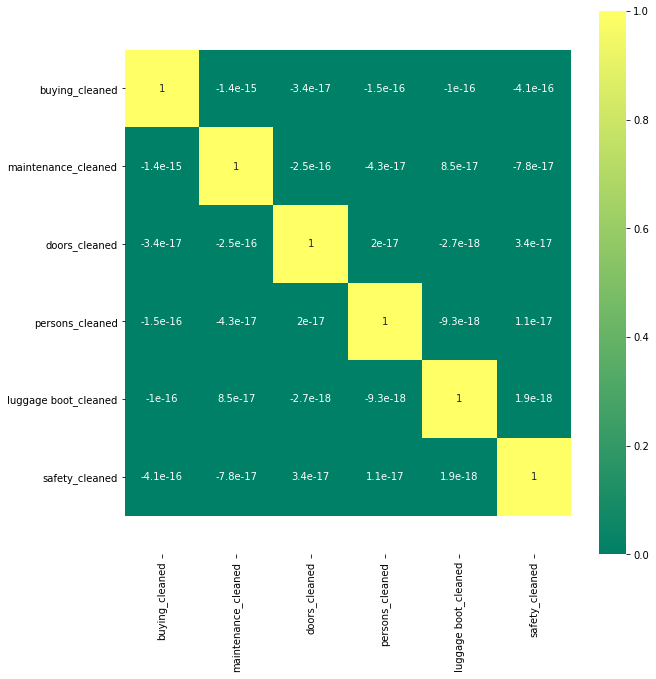

In [4]:
# correlations using heat map plot
plt.figure(figsize=(10,10))
ax = sns.heatmap(data.corr(),annot=True,cmap='summer', cbar=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)



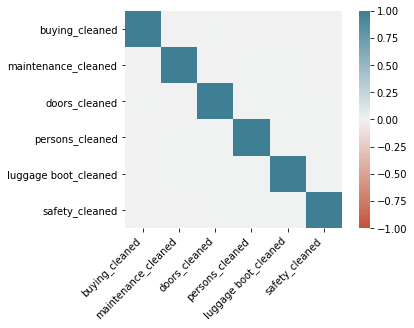

In [5]:
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
#fig.savefig('heatmap.png', dpi=fig.dpi)

- The heat map plot shows no correlation between attributes     

<AxesSubplot:xlabel='class', ylabel='count'>

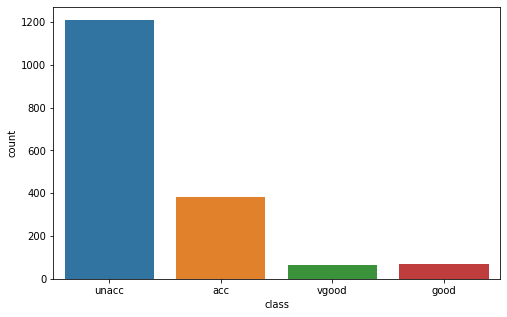

In [6]:
plt.figure(figsize=(8,5))

# count rows of each classes

sns.countplot(x="class", data=data)

- The above plot shows that the class is Imbalanced

# Step 3: Data Preparation


#### All attributes are relevant and useful, so all will be chosen to train the classifier 

In [7]:
used_features =[
 "buying_cleaned",
 "maintenance_cleaned",
 "doors_cleaned",
 "persons_cleaned",
 "luggage boot_cleaned",
 "safety_cleaned"
]
X = data[used_features] # Select all attributes that was cleaned and turned into numerical values
y = data["class"] # Classification on care 'class' (target attribute)
display(X.shape)
display(y.shape)


(1728, 6)

(1728,)

In [8]:
X = data[used_features] # Select all attributes except the last one (descriptive attributes)
y = data["class"] # Classification on animal 'class' (target attribute)
# import machine learning library to sample the data
from sklearn.model_selection import train_test_split
# split the data into training set and test set
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

# Step 5: Evaluation


### Default parameter configurations.

The prediction accuracy is: 97.11%


Text(0.5, 51.0, 'Predicted label')

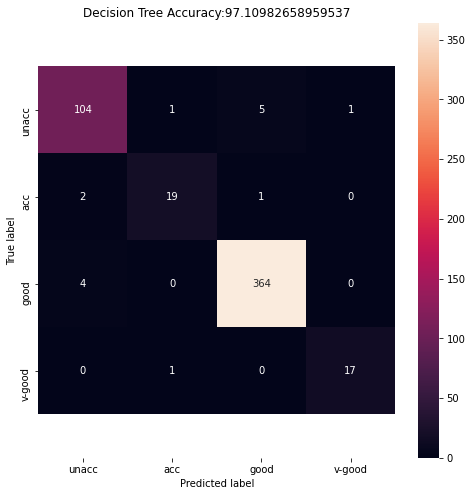

In [9]:
# Import the DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import seaborn as sns

# input the decision tree classifier using "entropy" & train the model
dtree = DecisionTreeClassifier(random_state = 0 , criterion = 'gini').fit(x_train, y_train)

# predict the classes of new, unseen data
predict = dtree.predict(x_test)
print("The prediction accuracy is: {0:2.2f}{1:s}".format(dtree.score(x_test,y_test)*100,"%"))

# Creates a confusion matrix
cm = confusion_matrix(y_test, predict)

# Transform to dataframe for easier plotting
cm_df = pd.DataFrame(cm, index = ['unacc','acc','good','v-good'],columns = ['unacc','acc','good','v-good'])

# plot the confusion matrix
plt.figure(figsize=(8,8))
ax= sns.heatmap(cm_df, annot=True, fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Decision Tree Accuracy:" + str(dtree.score(x_test,y_test)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [10]:
#Plotting the Tree
from sklearn import tree

fn = [ "buying_cleaned",
 "maintenance_cleaned",
 "doors_cleaned",
 "persons_cleaned",
 "luggage boot_cleaned",
 "safety_cleaned"
]
cn = ['unacc','acc','good','v-good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (50,50), dpi=300)
tree.plot_tree(dtree,filled = True, feature_names = fn, class_names = cn);
fig.savefig('imagename.png')


### Conducting 5 fold cross-validation

In [11]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score


#x_train,x_test,y_train,y_test = cross_validation.train_test_split(x,y,test_size=0.4,random_state=0)

# input the decision tree classifier using "entropy" & train the model
dtree = DecisionTreeClassifier(random_state = 0 , criterion = 'gini').fit(x_train, y_train)

# predict the classes of new, unseen data
predict = dtree.predict(x_test)
#print("The prediction accuracy is: {0:2.2f}{1:s}".format(dtree.score(x_test,y_test)*100,"%"))

# Creates a confusion matrix
cm = confusion_matrix(y_test, predict)

# Transform to dataframe for easier plotting
cm_df = pd.DataFrame(cm, index = ['unacc','acc','good','v-good'],columns = ['unacc','acc','good','v-good'])

# get score for the 10 fold cross validation
scores=[]
score = cross_val_score(dtree, x_train, y_train, cv=5, scoring='accuracy')
scores.append(score.mean())
print("cross validation score is : " + str(scores[0]*100)+"%")

cross validation score is : 96.60848393402146%


## configurating decision tree with entropy parameter  

The prediction accuracy is: 95.95%
              precision    recall  f1-score   support

         acc       0.92      0.90      0.91       111
        good       0.90      0.86      0.88        22
       unacc       0.97      0.98      0.98       368
       vgood       1.00      1.00      1.00        18

    accuracy                           0.96       519
   macro avg       0.95      0.94      0.94       519
weighted avg       0.96      0.96      0.96       519

The Cross valadtion score is:  0.9693940537018622


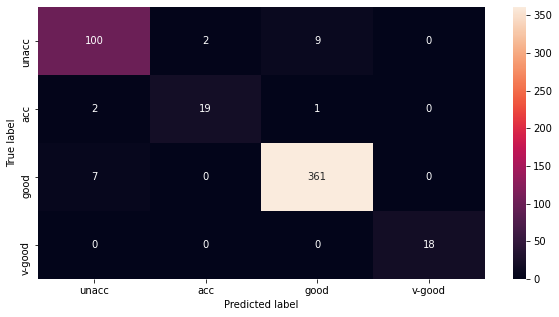

In [12]:
# Import the DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# input the decision tree classifier using "entropy" & train the model
dtree = DecisionTreeClassifier(random_state = 0 , criterion = 'entropy').fit(x_train, y_train)

# predict the classes of new, unseen data
predict = dtree.predict(x_test)
print("The prediction accuracy is: {0:2.2f}{1:s}".format(dtree.score(x_test,y_test)*100,"%"))

# Creates a confusion matrix
cm = confusion_matrix(y_test, predict)
# Transform to dataframe for easier plotting
cm_df = pd.DataFrame(cm, index = ['unacc','acc','good','v-good'],
columns = ['unacc','acc','good','v-good'])
# plot the confusion matrix
plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.ylabel('True label')
plt.xlabel('Predicted label')

print(classification_report(y_test,predict,labels=np.unique(predict)))
score = cross_val_score(dtree, x_train, y_train.values.ravel(), cv=5, scoring='accuracy')
print("The Cross valadtion score is: ",score.mean())

- Do cross-validation effect algorithms' performance?
##### It does effect the performance negatively
- Try using one other parameter configurations and compare them to their default configuration. How much they differs.?
##### By using the entropy parameter, it indicts that it has lower accuracy than Gini parameter 
